<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-data" data-toc-modified-id="Load-data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load data</a></span></li><li><span><a href="#Data-Growth" data-toc-modified-id="Data-Growth-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Growth</a></span></li><li><span><a href="#Hierarchical-Clustering" data-toc-modified-id="Hierarchical-Clustering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Hierarchical Clustering</a></span></li><li><span><a href="#PCA" data-toc-modified-id="PCA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>PCA</a></span></li><li><span><a href="#Normalize-to-reference-conditions" data-toc-modified-id="Normalize-to-reference-conditions-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Normalize to reference conditions</a></span></li></ul></div>

<font size="4">This is a template notebook for exploratory analysis on your organism's QC'ed dataset.</font>

In [1]:
import pandas as pd
import os
from os import path
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
sns.set_style('ticks')

# Load data

In [3]:
organism = "Mycobacterium_tuberculosis"

In [4]:
org_dir = path.join('../data/')
os.listdir(org_dir)

['Mycobacterium_tuberculosis_H37Rv_2020-08-20.tsv',
 'multiqc_stats.tsv',
 'metadata_final.csv',
 'metadata.csv',
 'log_tpm_final.csv',
 'metadata_qc.csv',
 'counts.csv',
 'log_tpm_norm.csv',
 'multiqc_report.html',
 'log_tpm_qc.csv',
 'ica_runs',
 'multiqc_stats_qc.csv',
 'log_tpm.csv']

In [5]:
DF_metadata = pd.read_csv(os.path.join(org_dir,'metadata_final.csv'),index_col=0)
DF_metadata_init = pd.read_csv(os.path.join(org_dir,'metadata.csv'),index_col=0)
DF_log_tpm = pd.read_csv(os.path.join(org_dir,'log_tpm_final.csv'),index_col=0)

# Data Growth

In [6]:
DF_metadata['ReleaseDate'] = pd.to_datetime(DF_metadata['ReleaseDate'])

In [7]:
first_date = min(DF_metadata['ReleaseDate'])
last_date = max(DF_metadata['ReleaseDate'])
date_range = pd.date_range(start=first_date,end=last_date,freq='YS')

Text(0.5, 1.0, 'Growth of M. tuberculosis H37Rv Samples in SRA')

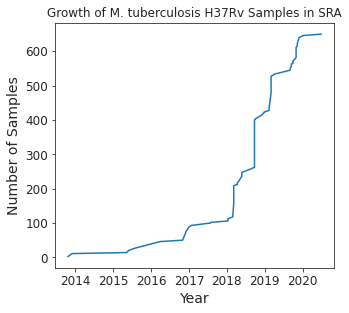

In [8]:
fig,ax = plt.subplots(figsize=(5,5))
growth = DF_metadata['ReleaseDate'].value_counts().sort_index().cumsum()
growth.plot(ax=ax)
plt.xticks(date_range,date_range.strftime('%Y'),rotation=0,ha='center')
ax.tick_params(labelsize=12)
ax.set_xlabel('Year',fontsize=14)
ax.set_ylabel('Number of Samples',fontsize=14)
ax.set_title("Growth of M. tuberculosis H37Rv Samples in SRA")

# Hierarchical Clustering

<font size=4> A clustermap is a great way to visualize the global correlations between one sample and all others. The following code uses hierarchical clustering to identify specific clusters in the clustermap <font size=4>
    
<font size=4> To increase the number of clusters, decrease the value of `thresh`. To decrease the number of clusters, increase the value of `thresh` <font size=4>

In [9]:
import scipy.cluster.hierarchy as sch
import matplotlib.patches as patches
# change this to get different number of clusters
thresh = .3

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

Number of cluster:  5


<font size="4">To view sample IDs in the clustermap, set `xticklabels` and `yticklabels` to `True`. You can increase the `size` variable to improve readability of sample IDs<font>

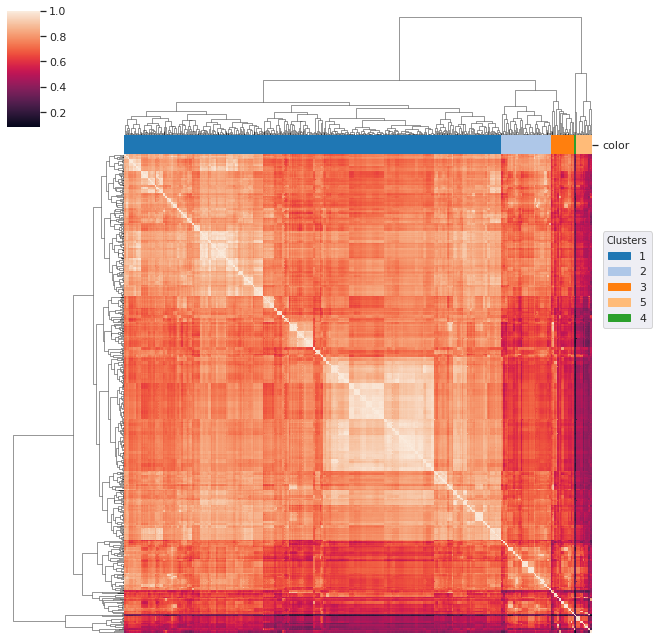

In [10]:
size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

In [11]:
DF_metadata.drop(list(clst.loc[clst["cluster"]==4]["cluster"].index),inplace=True)
DF_log_tpm.drop(columns=list(clst.loc[clst["cluster"]==4]["cluster"].index),inplace=True)

Number of cluster:  12


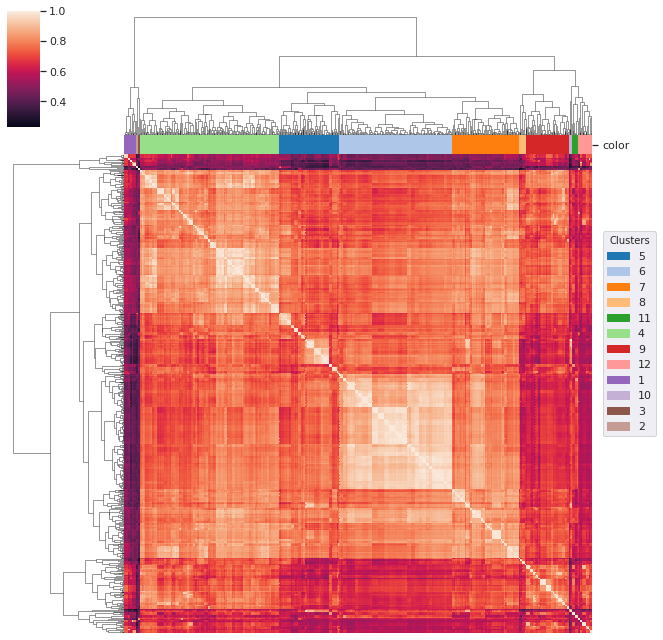

In [12]:
# change this to get different number of clusters
thresh = .3

# retrieve clusters using fcluster 
corr = DF_log_tpm.corr()
corr.fillna(0,inplace=True)
dist = sch.distance.pdist(corr)
link = sch.linkage(dist, method='complete')
clst = pd.DataFrame(index=DF_log_tpm.columns)
clst['cluster'] = sch.fcluster(link, thresh * dist.max(), 'distance')

#get colors for each cluster
cm = plt.cm.get_cmap('tab20')
clr = dict(zip(clst.cluster.unique(), cm.colors))
clst['color'] = clst.cluster.map(clr)

print('Number of cluster: ', len(clr))

size = 9

legend_TN = [patches.Patch(color=c, label=l) for l,c in clr.items()]

sns.set(rc={'figure.facecolor':'white'})
g = sns.clustermap(DF_log_tpm.corr(), figsize=(size,size), 
                   row_linkage=link, col_linkage=link, col_colors=clst.color,
                  yticklabels=False, xticklabels=False)

l2=g.ax_heatmap.legend(loc='upper left', bbox_to_anchor=(1.01,0.85), handles=legend_TN,frameon=True)
l2.set_title(title='Clusters',prop={'size':10})

# PCA

In [13]:
from sklearn.decomposition import PCA
import numpy as np

<font size="4"> First compute principal components.</font>

In [14]:
pca = PCA()
DF_weights = pd.DataFrame(pca.fit_transform(DF_log_tpm.T),index=DF_log_tpm.columns)
DF_components = pd.DataFrame(pca.components_.T,index=DF_log_tpm.index)

<font size="4"> Next, plot the cumulative explained variance</font>

Number of dimensions for 99% of variance: 221


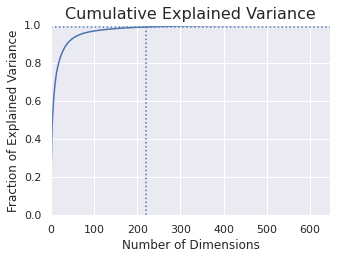

In [15]:
# Set the explained variance threshold
var_cutoff = 0.99

fig,ax = plt.subplots(figsize=(5,3.5))
pca_var = np.cumsum(pca.explained_variance_ratio_)
ax.plot(pca_var)
dims = np.where(pca_var > var_cutoff)[0][0] + 1
ax.vlines(dims,0,1,linestyles='dotted')
ax.hlines(var_cutoff,0,len(DF_log_tpm.columns),linestyles='dotted')
ax.set_ylim(0,1)
ax.set_xlim(0,len(DF_log_tpm.columns))
ax.set_ylabel('Fraction of Explained Variance',fontsize=12)
ax.set_xlabel('Number of Dimensions',fontsize=12)
ax.set_title('Cumulative Explained Variance',fontsize=16)
print('Number of dimensions for 99% of variance:',dims)

<font size="4">Finally, plot the first two principle components. The following code colors data by Project Name.</font>

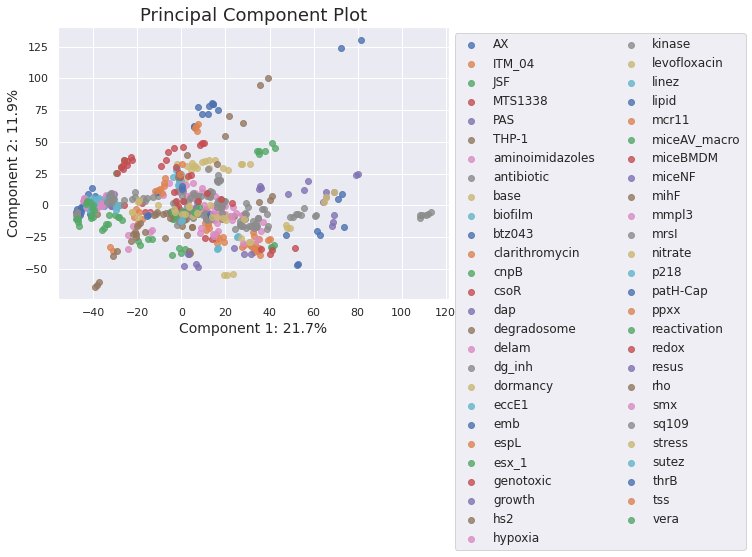

In [16]:
fig,ax = plt.subplots(figsize=(7,5))
for name,group in DF_metadata.groupby('project_name'):
    idx = DF_log_tpm.loc[:,group.index.tolist()].columns.tolist()
    ax.scatter(DF_weights.loc[idx,0],
               DF_weights.loc[idx,1],
               label=name,alpha=0.8)
ax.set_xlabel('Component 1: %.1f%%'%(pca.explained_variance_ratio_[0]*100),fontsize=14)
ax.set_ylabel('Component 2: %.1f%%'%(pca.explained_variance_ratio_[1]*100),fontsize=14)
ax.set_title('Principal Component Plot',fontsize=18)
plt.legend(bbox_to_anchor=(1,1),fontsize=12,ncol=2)

# Normalize to reference conditions

In [17]:
project_exprs = []
for name,group in DF_metadata.groupby('project_name'):
    ref_cond = group.reference_condition.unique()
    print(name)
    # Ensure that there is only one reference condition per project
    assert(len(ref_cond) == 1)
    ref_cond = ref_cond[0]
    
    # Ensure the reference condition is in fact in the project
    assert(ref_cond in group.condition_name.tolist())
    
    # Get reference condition sample ids
    ref_samples = group[group.condition_name == ref_cond].index
    
    # Get reference condition expression
    ref_expr = DF_log_tpm[ref_samples].mean(axis=1)
    
    # Subtract reference expression from project
    project_exprs.append(DF_log_tpm[group.index].sub(ref_expr,axis=0))

DF_log_tpm_norm = pd.concat(project_exprs,axis=1)

AX
ITM_04
JSF
MTS1338
PAS
THP-1
aminoimidazoles
antibiotic
base
biofilm
btz043
clarithromycin
cnpB
csoR
dap
degradosome
delam
dg_inh
dormancy
eccE1
emb
espL
esx_1
genotoxic
growth
hs2
hypoxia
kinase
levofloxacin
linez
lipid
mcr11
miceAV_macro
miceBMDM
miceNF
mihF
mmpl3
mrsI
nitrate
p218
patH-Cap
ppxx
reactivation
redox
resus
rho
smx
sq109
stress
sutez
thrB
tss
vera


In [18]:
DF_log_tpm_norm.head()

,SRX3995807,SRX3995806,SRX3995809,SRX3995808,SRX4619048,SRX4619047,SRX4619049,SRX4619050,SRX3995804,SRX3995805,...,SRX4498326,SRX4498328,SRX4498330,SRX4498336,SRX4498333,SRX4498338,SRX4498329,SRX4498325,SRX4498327,SRX4498331
Geneid,,,,,,,,,,,,,,,,,,,,,
Rv0001,-0.486562,-0.587343,-0.639070,-0.893601,-0.619806,-0.851647,-1.004805,-0.784694,-0.073320,0.073320,...,0.028268,0.053705,-0.103628,-0.936990,-1.024936,-1.148353,-1.225765,-1.265621,-1.086172,-0.953067
Rv0002,0.139333,0.156249,-0.153623,-0.165167,0.078200,-0.082552,-0.397041,-0.156147,-0.158724,0.158724,...,0.019950,-0.033874,-0.034214,-0.736087,-0.719764,-0.809914,-0.695590,-0.827083,-0.732343,-0.599262
Rv0003,-0.096734,0.048518,-0.084010,-0.232665,-0.096400,-0.212625,-0.458586,-0.110651,-0.106653,0.106653,...,-0.072163,-0.003633,0.009791,-0.528364,-0.622750,-0.574076,-0.553085,-0.590525,-0.280260,-0.361219
Rv0004,-0.142612,0.126625,-0.249805,0.393148,-0.230833,0.242319,0.152698,-0.061172,-0.105779,0.105779,...,0.058511,-0.021158,-0.009486,-0.077320,-0.191405,-0.072183,-0.163947,-0.189626,0.099636,-0.115325
Rv0005,0.017324,0.085618,0.104625,0.050548,0.073695,0.044653,0.109963,0.212333,0.058876,-0.058876,...,0.054441,0.012728,-0.068836,0.568737,0.474152,0.439670,0.228663,0.097991,0.322799,0.339321


<font size=4>Uncomment this code to save the log_tpm_norm file</font>

In [19]:
#DF_log_tpm_norm.to_csv(path.join(org_dir,'log_tpm_norm.csv'))

In [20]:
passed = list(DF_metadata.index)
DF_metadata_init["pass"] = ""
for i,row in DF_metadata_init.iterrows():
    if row["SRX Accession"] in passed:
        DF_metadata_init.loc[i,"pass"] = "pass"
    else:
        DF_metadata_init.loc[i,"pass"] = "fail"
DF_metadata_init["pass"]

sample_id
antibiotic__ctrl_4h__1    pass
antibiotic__ctrl_4h__2    pass
antibiotic__ctrl_4h__3    pass
antibiotic__cpf_4h__1     fail
antibiotic__cpf_4h__2     fail
                          ... 
fatty_acid__FA_NRP2__1    fail
lipid_2__dubos_exp__1     fail
lipid_2__dubos_stat__1    fail
lipid_2__FA_exp__1        fail
lipid_2__FA_stat__1       fail
Name: pass, Length: 980, dtype: object

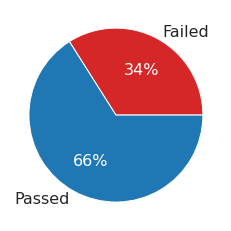

In [21]:
_,_,pcts = plt.pie(DF_metadata_init.value_counts("pass").sort_values(),
        labels = ['Failed','Passed'],
        colors=['tab:red','tab:blue'],
        autopct='%.0f%%',textprops={'size':16});

# Colors percents white
for pct in pcts:
    pct.set_color('white')